# Analyse en composantes principales (ACP)

# Principal component analysis (PCA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])

In [2]:
import matplotlib

def arrow2D(a,b, color='k', **kargs):
    astyle = matplotlib.patches.ArrowStyle("simple", head_length=.8, head_width=.8, tail_width=.1)
    plt.plot([a[0],b[0]], [a[1],b[1]] ,visible = False) # to define the visible windows
    plt.annotate("", xytext=a, xy=b, 
                 arrowprops=dict(arrowstyle=astyle, shrinkA=0, shrinkB=0, aa=True, color=color, **kargs))

## Nuage de points

Lorsqu'on a un nuage de points on peut étudier sa forme par une **analyse en composantes principales** (ACP). Cela revient
à chercher les vecteurs propres de la matrice de covariance (ou de corrélation qui est la matrice de covariance normalisée par les écarts types). Ces vecteurs propres nous décrivent le nuage de points.

Pour le vérifier fabriquons
un nuage de points avec une corrélation forte entre $x$ et $y$ :

$$  y = 0.2 \, x + 1.45 + U(-1,1) \quad \textrm{avec U la loi uniforme qui simule du bruit.}$$

Cette relation linéaire entre $x$ et $y$ permet de savoir que l'on a :

* une pente de 0.2
* un décalage vertical de 1.45 en x=0

Le but est de 
voir si, avec seulement le nuage de points, on peut retrouver la corrélation entre $x$ et $y$ malgré le bruit. 

$$ y = α x + β$$

## A cloud of dots

When we have a cloud of points we can study its shape by a **principal component analysis** (PCA). This comes back
to seek the eigenvectors of the covariance matrix (or correlation which is the covariance matrix normalized by the standard deviations). These eigenvectors describe the point cloud to us.

To check it, let's make
a scatter plot with a strong correlation between $x$ and $y$:

$$  y = 0.2 \, x + 1.45 + U(-1,1) \quad \textrm{avec U la loi uniforme qui simule du bruit.}$$

This linear relation between $x$ and $y$ allows us to know that we have:

*a slope of 0.2* a vertical offset of 1.45 in x=0

The goal is to
see if, with only the scatter plot, we can find the correlation between $x$ and $y$ despite the noise.

$$ y = α x + β$$

In [3]:
N = 50
x = 10 * np.random.rand(N) - 5
nuage = np.array([x, 0.2 * x + 1.45 + (2 * np.random.rand(N) - 1)])

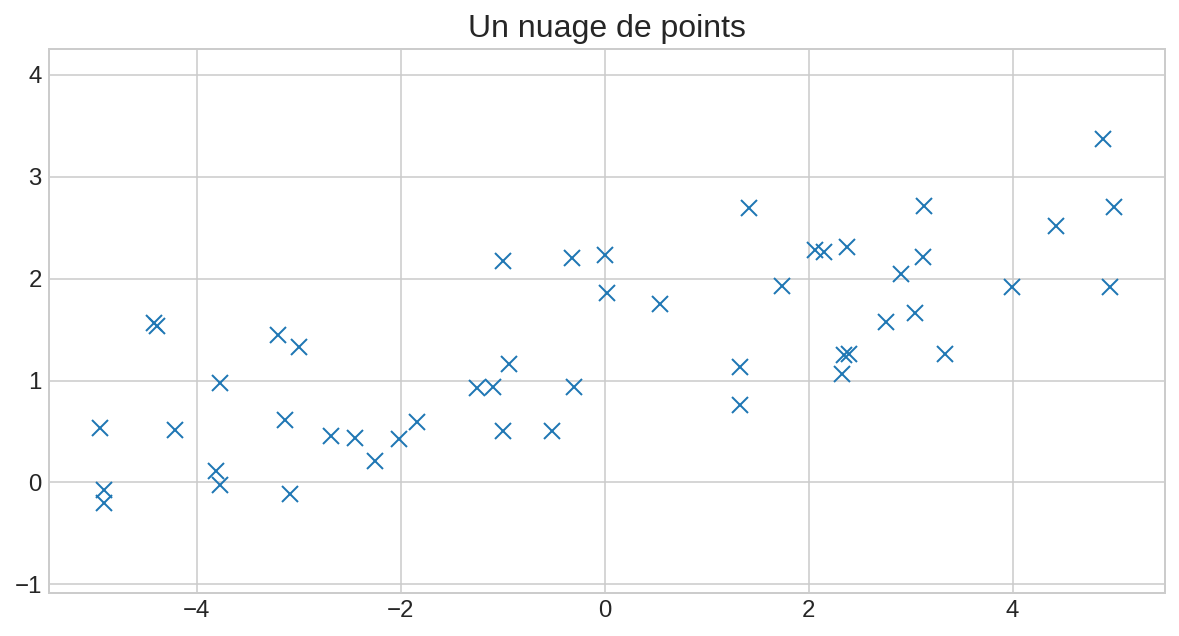

In [4]:
plt.plot(nuage[0], nuage[1], 'x')
plt.title('Un nuage de points')
plt.axis('equal');

Graphiquement on cherche la droite qui minimise la distance entre les points et leur projection sur la droite.


On peut aussi construire la **matrice de covariance** (cf ci-dessous) et voir que la pente du premier vecteur propre est 
égale à ce coefficient 0.2 qui relie x à y. 

Ensuite la moyenne du nuage de point dans un point de la droite qu'on cherche ce qui fait qu'avec le vecteur directeur qu'est le premier vecteur propre, on a notre droite.

Graphically, we are looking for the line that minimizes the distance between the points and their projection on the line.


We can also construct the **covariance matrix** (see below) and see that the slope of the first eigenvector is
equal to this coefficient 0.2 which connects x to y.

Then the average of the point cloud in a point of the line that we are looking for, which means that with the direction vector that is the first eigenvector, we have our line.

In [5]:
cov = np.cov(nuage.copy())
cov

array([[9.107, 1.925],
       [1.925, 0.764]])

Profitons de l'occasion pour rappeler que si une matrice est symétrique alors

* ses valeurs propres sont réelles
* ses vecteurs propres sont orthogonaux

Let us take this opportunity to recall that if a matrix is ​​symmetric then

* its eigenvalues are real
* its eigenvectors are orthogonal

In [6]:
val, vec = lin.eig(cov)
val = val.astype('float')  # on convertit puisqu'on sait que ce sont des réels
print("Valeurs propres de la matrice de covariance :", val,"\n")
print("Vecteurs propres de la matrice de covariance :\n", vec)

Valeurs propres de la matrice de covariance : [9.53  0.341] 

Vecteurs propres de la matrice de covariance :
 [[ 0.977 -0.215]
 [ 0.215  0.977]]


/tmp/ipykernel_26870/3419464211.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  val = val.astype('float')  # on convertit puisqu'on sait que ce sont des réels


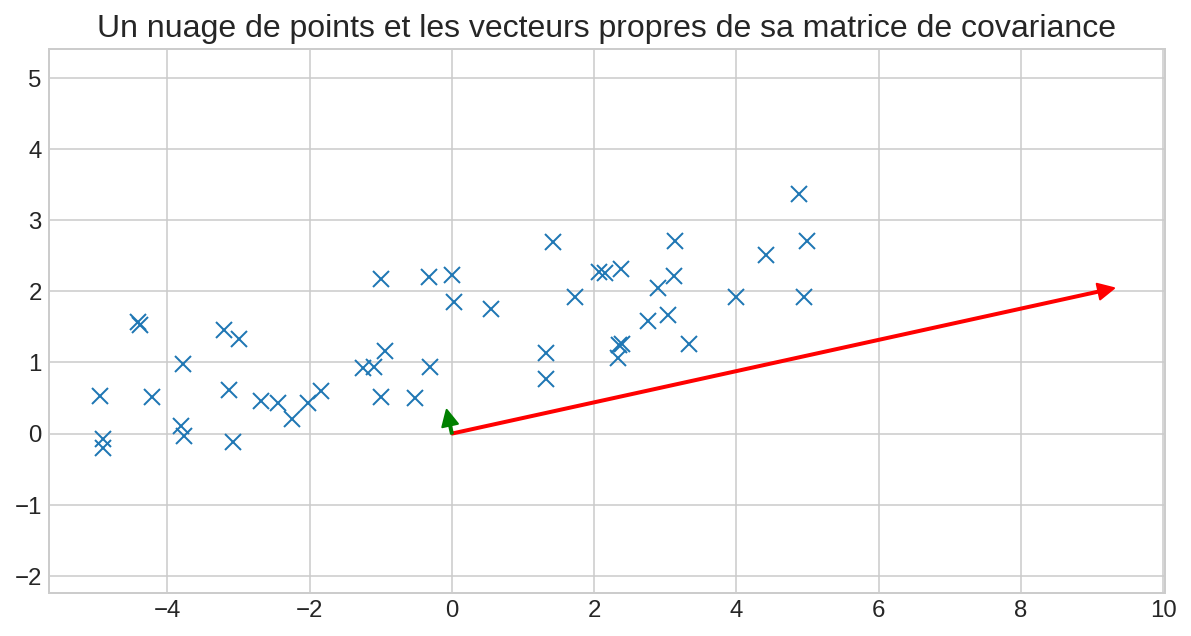

In [7]:
plt.plot(nuage[0], nuage[1], 'x')
arrow2D((0,0), val[0] * vec[:,0], 'r')  # vecteur propre multiplié par sa valeur propre
arrow2D((0,0), val[1] * vec[:,1], 'g')
plt.title('Un nuage de points et les vecteurs propres de sa matrice de covariance')
plt.axis('equal');

Vérifions que la pente du premier vecteur propre est proche de 0.2 :

Let's check that the slope of the first eigenvector is close to 0.2:

In [8]:
pente = vec[1,0] / vec[0,0]  
print("La pente est de", pente, '\n')
moyenne = nuage.mean(axis=1)
print("Le points moyen du nuage est", moyenne)

La pente est de 0.21963615318288862 

Le points moyen du nuage est [-0.152  1.327]


Le décalage verticale est de  1.360408912029785


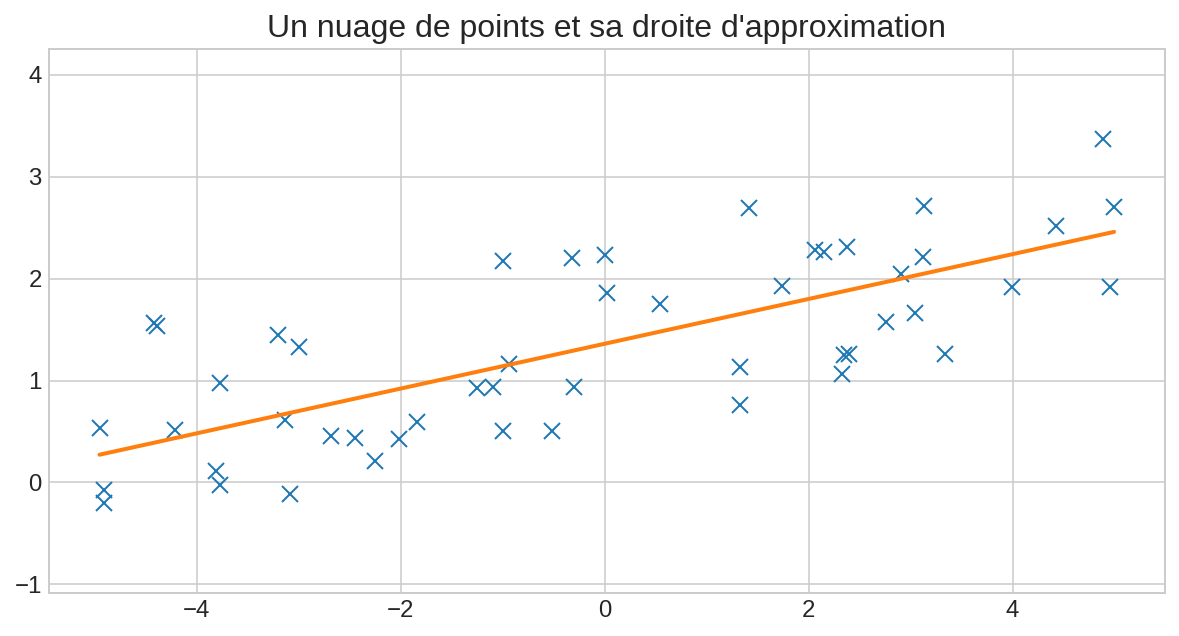

In [9]:
eq_droite = lambda x: pente * (x - moyenne[0]) + moyenne[1]

print("Le décalage verticale est de ", eq_droite(0))

plt.plot(nuage[0], nuage[1], 'x')
plt.plot([nuage[0].min(), nuage[0].max()], [eq_droite(nuage[0].min()), eq_droite(nuage[0].max())]) 
plt.title("Un nuage de points et sa droite d'approximation")
plt.axis('equal');

In [10]:
print(f'On a donc α = {pente:.3f} et β = {eq_droite(0):.3f} sachant que le nuage a été généré avec 0.2 et 1.45')

On a donc α = 0.220 et β = 1.360 sachant que le nuage a été généré avec 0.2 et 1.45


### Matrice de covariance

La covariance entre deux jeux de données __x__ et __y__ indique à quel point il sont liés (c.a.d. si la i-ème valeur de __y__ peut se déduire de la i-ème valeur de __x__ ou pas). Si leur covariance est grande 
en valeur absolue alors ils sont fortement liées, si elle est proche de 0, elles sont soit indépendantes 
soit liée par une relation plus compliquée qu'une simple relation linéaire.

La covariance mesure la relation linéaire entre 2 variables (cf [cette vidéo](https://www.youtube.com/watch?v=UM-AOmT2RWk)
pour une présentation rapide et complète de la covariance et de ses propriétés).

$$
\textrm{cov}(\textbf{x},\textbf{y}) = \frac{1}{N} \sum_{i=1}^N (x_i - \overline{\textbf{x}}) (y_i - \overline{\textbf{y}})
$$

avec $N$ le nombre de points du nuage, $\overline{\textbf{x}}$ et $\overline{\textbf{y}}$ les moyennes de $\textbf{x}$ et de $\textbf{y}$.

Si on place l'orgine des axes à la moyenne $(\overline{\textbf{x}},\overline{\textbf{y}})$ alors la formule indique que pour avoir corrélation il faut qu'il y ait plus de point dans 2 quadrans diagonalement opposés. 

Si à l'inverse on a tire des points aléatoire, donc pas de relation entre x et y, alors on aura des points répartit uniforméments autour de la moyenne donc une
covariance nulle.
Enfin si toutes les valeurs de $\textbf{y}$ valent une même valeur, alors elles ne dépendent pas de x et $y_i - \overline{\textbf{y}} = 0 \; \forall i$ donc la covariance est nulle.


### Covariance matrix

The covariance between two datasets __x__ and __y__ indicates how closely they are related (i.e. if the i-th value of __y__ can be deduced from the i-th value of __x__ or not). If their covariance is large
in absolute value then they are strongly related, if it is close to 0, they are either independent
is linked by a more complicated relationship than a simple linear relationship.

Covariance measures the linear relationship between 2 variables (see [this video](https://www.youtube.com/watch?v=UM-AOmT2RWk)
for a quick and complete presentation of covariance and its properties).

$$
\textrm{cov}(\textbf{x},\textbf{y}) = \frac{1}{N} \sum_{i=1}^N (x_i - \overline{\textbf{x}}) (y_i - \overline{\textbf{y}})
$$

with $N$ the number of points of the cloud, $\overline{\textbf{x}}$ and $\overline{\textbf{y}}$ the averages of $\textbf{x}$ and $\textbf{y}$.

If we place the origin of the axes at the mean $(\overline{\textbf{x}},\overline{\textbf{y}})$ then the formula indicates that to have correlation there must be more points in 2 diagonally opposite quadrans.

If, conversely, we draw random points, so no relationship between x and y, then we will have points distributed evenly around the mean, so a
zero covariance.
Finally if all the values ​​of $\textbf{y}$ have the same value, then they do not depend on x and $y_i - \overline{\textbf{y}} = 0 \; \forall i$ so the covariance is zero.

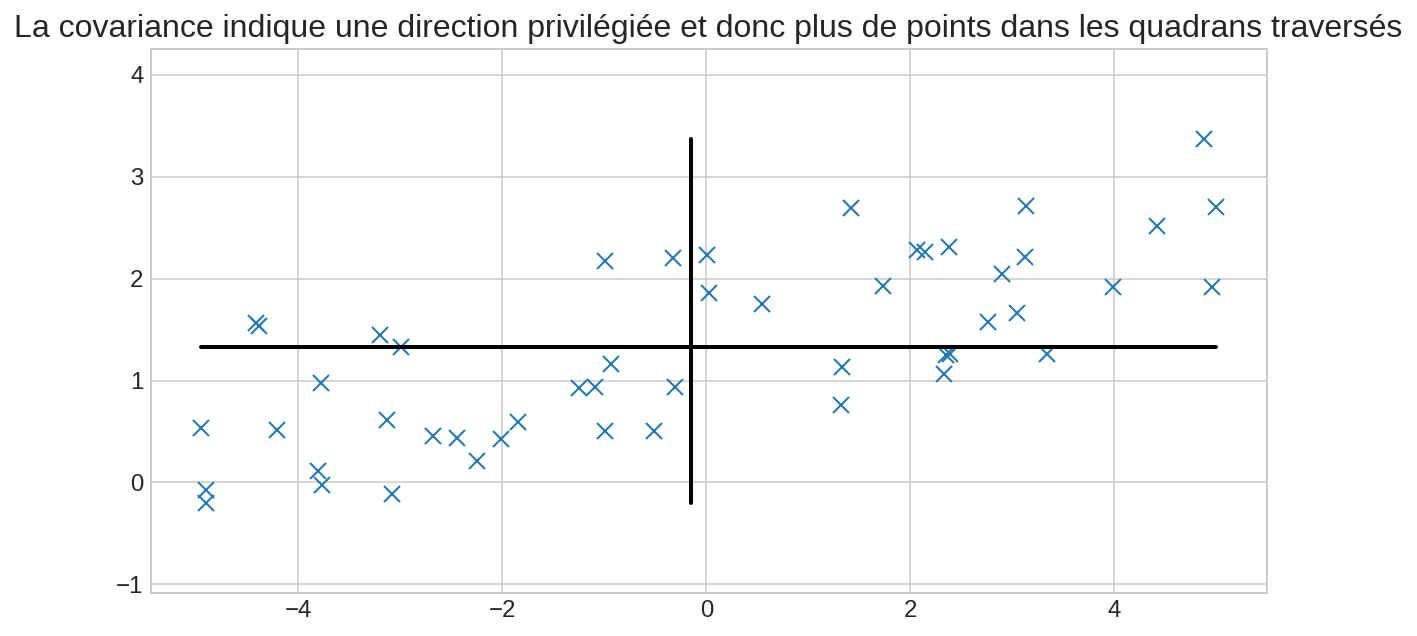

In [11]:
plt.plot(nuage[0], nuage[1], 'x')
plt.plot([moyenne[0], moyenne[0]], [nuage[1].min(), nuage[1].max()],'k')
plt.plot([nuage[0].min(), nuage[0].max()], [moyenne[1], moyenne[1]],'k')
plt.title('La covariance indique une direction privilégiée et donc plus de points dans les quadrans traversés')
plt.axis('equal');

Ici on voit bien que la grande majorité des points sont dans 2 quadrans opposés, dont nos 2 variables sont liées.

La matrice de covariance exprime toutes les covariances possibles entre les variables. Dans notre cas où 
le nuage a 2 dimensions, on a :

$$
\textrm{Cov(nuage 2D)} = 
\begin{bmatrix}
\textrm{cov}(\textbf{x},\textbf{x}) & \textrm{cov}(\textbf{x},\textbf{y}) \\
\textrm{cov}(\textbf{y},\textbf{x}) & \textrm{cov}(\textbf{y},\textbf{y})  \\
\end{bmatrix}
$$

Here we can clearly see that the vast majority of points are in 2 opposite quadrans, of which our 2 variables are linked.

The covariance matrix expresses all the possible covariances between the variables. In our case where
the cloud has 2 dimensions, we have:

$$
\textrm{Cov(nuage 2D)} = 
\begin{bmatrix}
\textrm{cov}(\textbf{x},\textbf{x}) & \textrm{cov}(\textbf{x},\textbf{y}) \\
\textrm{cov}(\textbf{y},\textbf{x}) & \textrm{cov}(\textbf{y},\textbf{y})  \\
\end{bmatrix}
$$

In [12]:
cov = lambda x,y : np.dot((x - x.mean()), (y - y.mean())) / len(x)

Cov = lambda x,y : np.array([[cov(x,x), cov(x,y)], [cov(y,x), cov(y,y)]])

Cov(nuage[0], nuage[1]) # par défaut Numpy divise par (N-1), avec bias=True il divise par N et donne ce résultat

array([[8.925, 1.887],
       [1.887, 0.749]])

Ce résultat montre que x est très liés avec lui-même ce qui est une évidence. Par contre il semble que y soit
moins lié avec lui-même. En fait les variation de y sont plus petites (entre 0 et 3 alors que x varie entre -5 et 5) ce qui explique cette plus petite valeur. Le fait que cov(x,y) soit plus grand que cov(y,y) est déjà un
indicateur que x et y sont liés.

Le calcul des valeurs et vecteurs propres de la matrice de covariance est encore plus intéressant avec
une grande dimension car il fait ressortir lesquelles sont les plus importantes. Ainsi l'exemple de l'article
de Wikipédia sur l'['analyse en composantes principales](https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales)
sur la pollution de l'eau du Doubs montre que le premier vecteur propre est celui des  polluants connus : nitrates (nit), phosphates (pho), ammoniaque (amm)
et le second est celui du PH. On notera l'anti-corrélation entre la teneur en oxygène et les polluants.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Cercle_des_cor%C3%A9lations_d%27une_ACP_norm%C3%A9e.svg/500px-Cercle_des_cor%C3%A9lations_d%27une_ACP_norm%C3%A9e.svg.png"/>

This result shows that x is very linked with itself, which is obvious. On the other hand, it seems that there is
less connected with himself. In fact the variations of y are smaller (between 0 and 3 while x varies between -5 and 5) which explains this smaller value. The fact that cov(x,y) is greater than cov(y,y) is already a
indicator that x and y are related.

The calculation of the eigenvalues ​​and vectors of the covariance matrix is ​​even more interesting with
a large dimension because it highlights which are the most important. Thus the example of the article
from Wikipedia on ['principal component analysis](https://fr.wikipedia.org/wiki/Analyse_en_principales_components)
on the pollution of the Doubs water shows that the first clean vector is that of known pollutants: nitrates (nit), phosphates (pho), ammonia (amm)
and the second is that of PH. Note the anti-correlation between oxygen content and pollutants.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Cercle_des_cor%C3%A9lations_d%27une_ACP_norm%C3%A9e.svg/500px-Cercle_des_cor%C3%A9lations_d%27une_ACP_norm%C3%A9e.svg.png"/>

Pour bien comprendre cette figure et voir un cas d'utilisation, je vous invite à regarder cet
[exemple d'ACP avec Excel](https://www.youtube.com/watch?v=GNBeWpkHFJw).

To fully understand this figure and see a use case, I invite you to watch this
[example of PCA with Excel](https://www.youtube.com/watch?v=GNBeWpkHFJw).